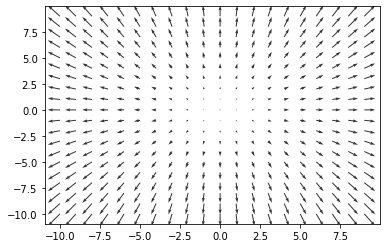

In [83]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10,10,1)
y = np.arange(-10,10,1)
u,v = np.meshgrid(x,y)
plt.quiver(x,y,u,v,alpha=0.8)

C:\Users\19234\AppData\Local\Temp\ipykernel_20848\3990678558.py:10: RuntimeWarning:

invalid value encountered in divide

C:\Users\19234\AppData\Local\Temp\ipykernel_20848\3990678558.py:11: RuntimeWarning:

invalid value encountered in divide



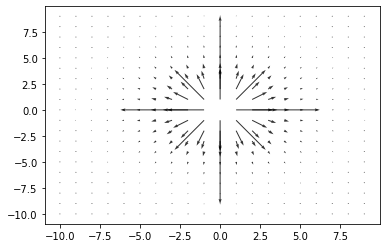

In [84]:
import torch
from torch import autograd

xymax=10
x = np.arange(-xymax,xymax,1)
y = np.arange(-xymax,xymax,1)
x0=0
y0=0
u,v = np.meshgrid(x,y)
Fx=u/np.power((u-x0)**2+(v-y0)**2,1.5)
Fy=v/np.power((u-x0)**2+(v-y0)**2,1.5)

plt.quiver(x,y,Fx,Fy,alpha=0.8,scale=4)


In [85]:
u[0],v[0]

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9]),
 array([-10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10, -10,
        -10, -10, -10, -10, -10, -10, -10]))

In [86]:
x=torch.arange(-xymax,xymax,1,dtype=float,requires_grad=True)
y=torch.arange(-xymax,xymax,1,dtype=float,requires_grad=True)
u,v=torch.meshgrid(x,y)#生成方式不同
grad_list=torch.empty_like(v)
Fx=v/torch.pow((u-x0)**2+(v-y0)**2,1.5)
Fy=u/torch.pow((u-x0)**2+(v-y0)**2,1.5)


In [87]:
u[0],v[0]

(tensor([-10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10., -10.,
         -10., -10., -10., -10., -10., -10., -10., -10.], dtype=torch.float64,
        grad_fn=<SelectBackward0>),
 tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
           2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.], dtype=torch.float64,
        grad_fn=<SelectBackward0>))

In [88]:
for i in range(0,2*xymax):
    for m in range(0,2*xymax):
        x=u[i,m]
        y=v[i,m]
        Fx=x/torch.pow((x-x0)**2+(y-y0)**2,1.5)
        Fy=y/torch.pow((x-x0)**2+(y-y0)**2,1.5)
        div=autograd.grad(Fx,x)[0].item()+autograd.grad(Fy,y)[0].item()#计算散度
        grad_list[i,m]=div
import plotly.graph_objects as go
fig=go.Figure()
fig.add_trace(go.Scatter3d(x=u.flatten().detach(),y=v.flatten().detach(),z=grad_list.flatten()))


In [89]:
grad_list

tensor([[-3.5355e-04, -4.1066e-04, -4.7614e-04, -5.4982e-04, -6.3051e-04,
         -7.1554e-04, -8.0041e-04, -8.7874e-04, -9.4287e-04, -9.8519e-04,
         -1.0000e-03, -9.8519e-04, -9.4287e-04, -8.7874e-04, -8.0041e-04,
         -7.1554e-04, -6.3051e-04, -5.4982e-04, -4.7614e-04, -4.1066e-04],
        [-4.1066e-04, -4.8498e-04, -5.7273e-04, -6.7466e-04, -7.9017e-04,
         -9.1631e-04, -1.0467e-03, -1.1712e-03, -1.2761e-03, -1.3467e-03,
         -1.3717e-03, -1.3467e-03, -1.2761e-03, -1.1712e-03, -1.0467e-03,
         -9.1631e-04, -7.9017e-04, -6.7466e-04, -5.7273e-04, -4.8498e-04],
        [-4.7614e-04, -5.7273e-04, -6.9053e-04, -8.3250e-04, -1.0000e-03,
         -1.1910e-03, -1.3975e-03, -1.6033e-03, -1.7834e-03, -1.9082e-03,
         -1.9531e-03, -1.9082e-03, -1.7834e-03, -1.6033e-03, -1.3975e-03,
         -1.1910e-03, -1.0000e-03, -8.3250e-04, -6.9053e-04, -5.7273e-04],
        [-5.4982e-04, -6.7466e-04, -8.3250e-04, -1.0308e-03, -1.2761e-03,
         -1.5709e-03, -1.9082e-03, 

In [94]:
num=100
xymax=5
X = np.linspace(-xymax,xymax,num)
Y = np.linspace(-xymax,xymax,num)
res=[]
#u为不同x值

for i in range(num):
    #同一个y
    temp=[]
    for j in range(num):
        z=complex(X[j],Y[i])
        temp.append(z+1/z)
    res.append(temp)


In [95]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=np.array(res[29]).real,y=np.array(res[29]).imag))
fig.show()

In [92]:
np.array(res[0]).real

array([-5.1       , -4.8958316 , -4.69147523, -4.48690804, -4.28210561,
       -4.07704212, -3.87169058, -3.66602317, -3.4600117 , -3.25362819,
       -3.04684561, -2.83963878, -2.63198538, -2.4238671 , -2.21527094,
       -2.00619043, -1.79662696, -1.58659092, -1.3761026 , -1.16519283,
       -0.95390321, -0.74228571, -0.53040194, -0.31832162, -0.10612075,
        0.10612075,  0.31832162,  0.53040194,  0.74228571,  0.95390321,
        1.16519283,  1.3761026 ,  1.58659092,  1.79662696,  2.00619043,
        2.21527094,  2.4238671 ,  2.63198538,  2.83963878,  3.04684561,
        3.25362819,  3.4600117 ,  3.66602317,  3.87169058,  4.07704212,
        4.28210561,  4.48690804,  4.69147523,  4.8958316 ,  5.1       ])